<a href="https://colab.research.google.com/github/mahatalakshmi/ml_learning/blob/main/BTS_face_recognition_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sharad5/korean-band-bts-members-face-recognition

 84% 13.0M/15.5M [00:01<00:00, 16.3MB/s]
100% 15.5M/15.5M [00:01<00:00, 11.7MB/s]


In [ ]:
! unzip korean-band-bts-members-face-recognition.zip

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 7 directories and 0 images in 'images'.
There are 0 directories and 157 images in 'images/jhope'.
There are 0 directories and 170 images in 'images/rm'.
There are 0 directories and 189 images in 'images/jin'.
There are 0 directories and 196 images in 'images/v'.
There are 0 directories and 167 images in 'images/suga'.
There are 0 directories and 192 images in 'images/jimin'.
There are 0 directories and 155 images in 'images/jungkook'.


In [ ]:
data_dir="/content/images"

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1226 files belonging to 7 classes.
Using 981 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1226 files belonging to 7 classes.
Using 245 files for validation.


In [ ]:
class_names = val_ds.class_names
print(class_names)

['jhope', 'jimin', 'jin', 'jungkook', 'rm', 'suga', 'v']


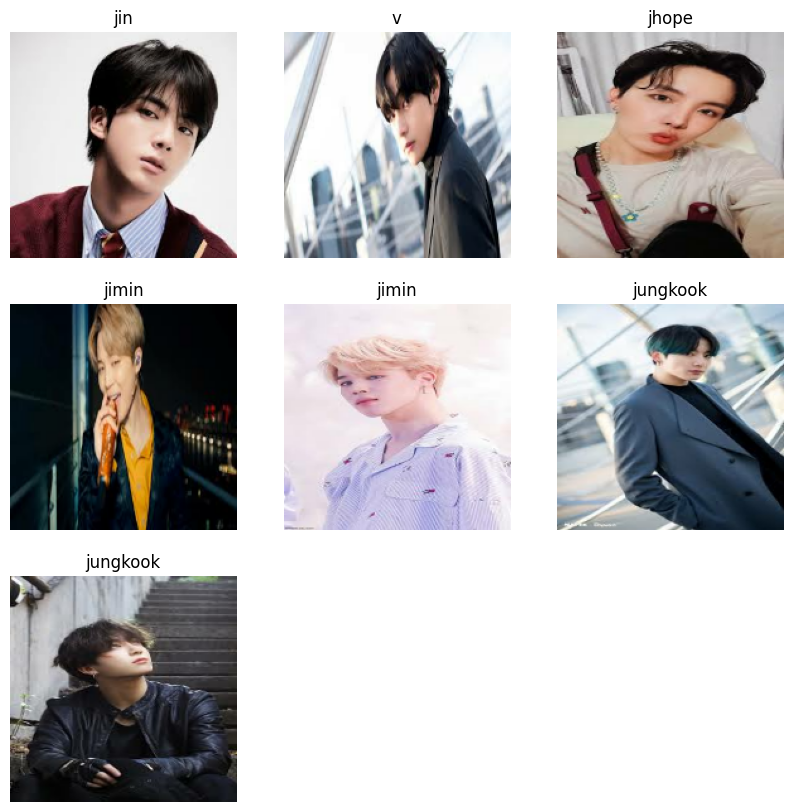

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(7):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=7,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 7)                3591      
 pper)                                                           
                                                                 
Total params: 24,640,391
Trainable params: 1,052,679
Non-trainable params: 23,587,712
__________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=20

history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
31/31 [==============================] - 8s 124ms/step - loss: 2.9090 - accuracy: 0.1427 - val_loss: 1.9761 - val_accuracy: 0.1796
Epoch 2/20
31/31 [==============================] - 3s 92ms/step - loss: 1.7182 - accuracy: 0.3231 - val_loss: 1.8621 - val_accuracy: 0.2653
Epoch 3/20
31/31 [==============================] - 4s 112ms/step - loss: 1.4855 - accuracy: 0.4536 - val_loss: 1.9218 - val_accuracy: 0.2816
Epoch 4/20
31/31 [==============================] - 3s 94ms/step - loss: 1.2327 - accuracy: 0.5739 - val_loss: 1.7951 - val_accuracy: 0.3673
Epoch 5/20
31/31 [==============================] - 3s 93ms/step - loss: 1.0319 - accuracy: 0.6769 - val_loss: 1.8621 - val_accuracy: 0.3755
Epoch 6/20
31/31 [==============================] - 3s 101ms/step - loss: 0.8203 - accuracy: 0.7676 - val_loss: 1.8561 - val_accuracy: 0.3796
Epoch 7/20
31/31 [==============================] - 3s 95ms/step - loss: 0.6625 - accuracy: 0.8236 - val_loss: 1.9435 - val_accuracy: 0.3673
Epoch 8/20

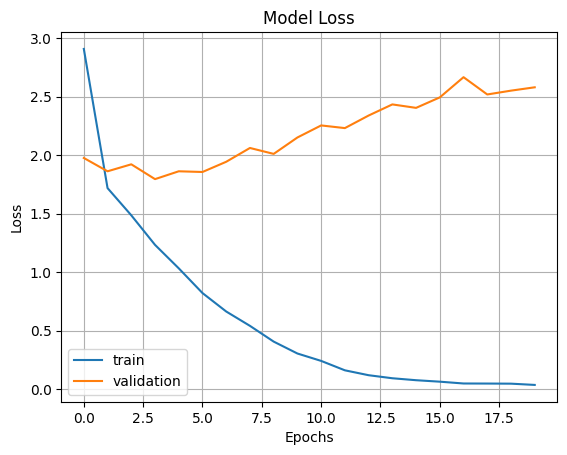

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import cv2
image=cv2.imread("/content/images/jin/jin110.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[6.7901374e-03 2.3892637e-02 8.6231416e-01 6.5621749e-02 6.7165709e-04
  4.3100945e-04 4.0278476e-02]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is jin
